### 1.3) How will you solve the normal equation if rank(A) < n?

#### In the case that rank(A) < n, the tactics used in the written proof that solve the Normal Equation do not hold. From here, we still need a solution to the Normal Equation. 

#### One way to solve the Normal Equation when A is rank deficient, is to make use of the psuedo-inverse of A. pinv(A) times y gives a solution to the Normal Equation

In [1]:
import mp_tools as mpt
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import time
from itertools import combinations
import math

testX, testY, trainX, trainY = mpt.import_data()

In [2]:
def run_all(trainX,trainY,testX,testY,L):
    w = np.random.normal(size=(L,785))
    b = np.random.normal(size=(L,1))

    id_train = mpt.randomize_data(trainX,w,b)
    id_test = mpt.randomize_data(testX,w,b)
    id_train_res = []
    id_test_res = []
    print("g(x) = x")
    ovo_weights = mpt.get_ovo_weights(id_train,trainY,id_test, testY)
    trovo_bin_preds = mpt.get_ovo_bin_preds(ovo_weights,id_train)
    id_train_res.append(mpt.OVO_classifier(trovo_bin_preds,trainY,train=True))
    ovo_bin_preds = mpt.get_ovo_bin_preds(ovo_weights,id_test)
    id_test_res.append(mpt.OVO_classifier(ovo_bin_preds, testY))
    ova_weights = mpt.get_ova_weights(id_train,trainY,id_test, testY)
    trova_bin_preds = mpt.get_ova_bin_preds(ova_weights,id_train)
    id_train_res.append(mpt.OVA_classifier(trova_bin_preds, trainY,train=True))
    ova_bin_preds = mpt.get_ova_bin_preds(ova_weights, id_test)
    id_test_res.append(mpt.OVA_classifier(ova_bin_preds, testY))

    sig_train = mpt.sig_data(trainX,w,b)
    sig_test = mpt.sig_data(testX,w,b)
    sig_train_res = []
    sig_test_res = []
    print("g(x) = sigmoid function")
    ovo_weights = mpt.get_ovo_weights(sig_train,trainY,sig_test, testY)
    trovo_bin_preds = mpt.get_ovo_bin_preds(ovo_weights,sig_train)
    sig_train_res.append(mpt.OVO_classifier(trovo_bin_preds,trainY,train=True))
    ovo_bin_preds = mpt.get_ovo_bin_preds(ovo_weights,sig_test)
    sig_test_res.append(mpt.OVO_classifier(ovo_bin_preds, testY))
    ova_weights = mpt.get_ova_weights(sig_train,trainY,sig_test, testY)
    trova_bin_preds = mpt.get_ova_bin_preds(ova_weights,sig_train)
    sig_train_res.append(mpt.OVA_classifier(trova_bin_preds, trainY, train=True))
    ova_bin_preds = mpt.get_ova_bin_preds(ova_weights, sig_test)
    sig_test_res.append(mpt.OVA_classifier(ova_bin_preds, testY))

    sin_train = mpt.sin_data(trainX,w,b)
    sin_test = mpt.sin_data(testX,w,b)
    sin_train_res = []
    sin_test_res = []
    print("g(x) = sin(x)")
    ovo_weights = mpt.get_ovo_weights(sin_train,trainY,sin_test, testY)
    trovo_bin_preds = mpt.get_ovo_bin_preds(ovo_weights,sin_train)
    sin_train_res.append(mpt.OVO_classifier(trovo_bin_preds,trainY,train=True))
    ovo_bin_preds = mpt.get_ovo_bin_preds(ovo_weights,sin_test)
    sin_test_res.append(mpt.OVO_classifier(ovo_bin_preds, testY))
    ova_weights = mpt.get_ova_weights(sin_train,trainY,sin_test, testY)
    trova_bin_preds = mpt.get_ova_bin_preds(ova_weights,sin_train,)
    sin_train_res.append(mpt.OVA_classifier(trova_bin_preds, trainY,train=True))
    ova_bin_preds = mpt.get_ova_bin_preds(ova_weights, sin_test)
    sin_test_res.append(mpt.OVA_classifier(ova_bin_preds, testY))

    max_train = mpt.max_data(trainX,w,b)
    max_test = mpt.max_data(testX,w,b)
    max_train_res = []
    max_test_res = []
    print("g(x) = Rectified Linear Unit Function")
    ovo_weights = mpt.get_ovo_weights(max_train,trainY,max_test, testY)
    trovo_bin_preds = mpt.get_ovo_bin_preds(ovo_weights,max_train)
    max_train_res.append(mpt.OVO_classifier(trovo_bin_preds,trainY,train=True))
    ovo_bin_preds = mpt.get_ovo_bin_preds(ovo_weights,max_test)
    max_test_res.append(mpt.OVO_classifier(ovo_bin_preds, testY))
    ova_weights = mpt.get_ova_weights(max_train,trainY,max_test, testY)
    trova_bin_preds = mpt.get_ova_bin_preds(ova_weights,max_train)
    max_train_res.append(mpt.OVA_classifier(trova_bin_preds, trainY, train=True))
    ova_bin_preds = mpt.get_ova_bin_preds(ova_weights, max_test)
    max_test_res.append(mpt.OVA_classifier(ova_bin_preds, testY))
    
    res = id_train_res,id_test_res,sig_train_res,sig_test_res,sin_train_res,sin_test_res,max_train_res, max_test_res
    
    return res



In [3]:
ovo_weights = mpt.get_ovo_weights(trainX,trainY,testX, testY)
trovo_bin_preds = mpt.get_ovo_bin_preds(ovo_weights,trainX)    # preds for binary classifiers for training data
ovo_bin_preds = mpt.get_ovo_bin_preds(ovo_weights,testX)       # preds for binary classifiers for testing data
mpt.OVO_classifier(trovo_bin_preds,trainY, train=True)
x=mpt.OVO_classifier(ovo_bin_preds, testY)

TRAINING DATA RESULTS
One vs. One error count:
3734
One vs. One error percentenge:
6.223333%
One vs One Confusion matrix:
[[5806    2   51   26   14   44   27   10   35   22]
 [   2 6623   68   42   18   48   16   76  195   14]
 [  15   36 5521  119   20   39   36   53   42   17]
 [   8   17   49 5579    5  138    2    7  107   82]
 [  11    7   57    9 5586   23   32   69   48  155]
 [  19   16   21  161   11 4967   84    9  142   30]
 [  22    2   42   18   14   93 5690    0   37    3]
 [   6   11   44   48   16   10    0 5881   25  137]
 [  33   21   92   90    8   46   30    5 5155   31]
 [   1    7   13   39  150   13    1  155   65 5458]]


TESTING DATA RESULTS
One vs. One error count:
703
One vs. One error percentenge:
7.030000%
One vs One Confusion matrix:
[[ 961    0    9    9    2    7    6    1    7    6]
 [   0 1120   18    1    4    5    5   16   17    5]
 [   1    3  936   18    6    3   12   17    8    1]
 [   1    3   12  926    1   30    0    3   23   11]
 [   0    1  

### Here we see that the One Vs. One classifier has an error rate of 7.03%.
#### -  0 and 1 are the easiest digits to recognize
#### -  8 and 5 are the hardest digits to recognize. 

In [4]:
ova_weights = mpt.get_ova_weights(trainX,trainY,testX, testY)
trova_bin_preds = mpt.get_ova_bin_preds(ova_weights, trainX)
ova_bin_preds = mpt.get_ova_bin_preds(ova_weights, testX)
mpt.OVA_classifier(trova_bin_preds, trainY,train=True)
mpt.OVA_classifier(ova_bin_preds, testY)

TRAINING DATA RESULTS
One vs. All Classifier error count:
8536
One vs. All error percentage:
14.226667%
printing out One vs All Confusion matrix
[[5682    2   99   42   10  164  108   55   75   68]
 [   7 6548  264  167   99   95   74  189  493   60]
 [  18   40 4792  176   42   28   61   37   63   20]
 [  14   15  149 5158    6  432    1   47  226  117]
 [  24   19  108   32 5212  105   70  170  105  371]
 [  43   31   11  125   50 3991   90    9  221   12]
 [  64   14  234   56   39  192 5476    2   56    4]
 [   4   12   91  115   23   36    0 5426   20  492]
 [  61   55  192  135   59  235   35   10 4412   38]
 [   6    6   18  125  302  143    3  320  180 4767]]


TESTING DATA RESULTS
One vs. All Classifier error count:
1397
One vs. All error percentage:
13.970000%
printing out One vs All Confusion matrix
[[ 944    0   18    4    0   23   18    5   14   15]
 [   0 1107   54   17   22   18   10   40   46   11]
 [   1    2  813   23    6    3    9   16   11    2]
 [   2    2   26  8

13.97

### Here we see that to One Vs. All Classifier has an error rate of 13.97% on the testing data.

#### Again, we see that the easiest digits to recognize are 0 and 1

#### While the hardest digits to recognize are 5 and 8

In [5]:
L = 1000
w = np.random.normal(size=(L,785))
b = np.random.normal(size=(L,1))
id_train_res = []
id_test_res = []
sig_train_res = []
sig_test_res = []
sin_train_res = []
sin_test_res = []
max_train_res = []
max_test_res = []

In [6]:
id_train = mpt.randomize_data(trainX,w,b)
id_test = mpt.randomize_data(testX,w,b)

In [7]:
print("g(x) = x")
ovo_weights = mpt.get_ovo_weights(id_train,trainY,id_test, testY)
trovo_bin_preds = mpt.get_ovo_bin_preds(ovo_weights,id_train)
id_train_res.append(mpt.OVO_classifier(trovo_bin_preds,trainY,train=True))
ovo_bin_preds = mpt.get_ovo_bin_preds(ovo_weights,id_test)
id_test_res.append(mpt.OVO_classifier(ovo_bin_preds, testY))

g(x) = x
TRAINING DATA RESULTS
One vs. One error count:
3723
One vs. One error percentenge:
6.205000%
One vs One Confusion matrix:
[[5806    2   49   25   14   43   27    9   35   20]
 [   2 6623   68   43   18   47   15   74  196   15]
 [  15   36 5523  119   20   39   36   53   42   18]
 [   8   17   48 5579    5  136    2    8  107   82]
 [  11    7   57    8 5586   23   31   69   48  155]
 [  19   16   21  161   11 4972   83    9  142   30]
 [  22    2   43   18   14   93 5692    0   37    3]
 [   6   11   44   48   16   10    0 5884   25  138]
 [  33   21   92   90    8   45   31    5 5154   30]
 [   1    7   13   40  150   13    1  154   65 5458]]


TESTING DATA RESULTS
One vs. One error count:
701
One vs. One error percentenge:
7.010000%
One vs One Confusion matrix:
[[ 961    0    9    9    2    6    7    0    7    6]
 [   0 1119   18    1    2    6    5   16   17    5]
 [   1    3  936   18    7    3   12   17    8    1]
 [   1    4   12  926    1   30    0    3   23   11]
 [  

### g(x) = x

#### Here we see that the error rate for our feature mapping is very close and essentially mirrors the error rate for our previous One Vs. One classifier for both the training and testing data

In [8]:
ova_weights = mpt.get_ova_weights(id_train,trainY,id_test, testY)
trova_bin_preds = mpt.get_ova_bin_preds(ova_weights,id_train)
id_train_res.append(mpt.OVA_classifier(trova_bin_preds, trainY))
ova_bin_preds = mpt.get_ova_bin_preds(ova_weights, id_test)
id_test_res.append(mpt.OVA_classifier(ova_bin_preds, testY))

TESTING DATA RESULTS
One vs. All Classifier error count:
8536
One vs. All error percentage:
14.226667%
printing out One vs All Confusion matrix
[[5682    2   99   42   10  164  108   55   75   68]
 [   7 6548  264  167   99   95   74  189  493   60]
 [  18   40 4792  176   42   28   61   37   63   20]
 [  14   15  149 5158    6  432    1   47  226  117]
 [  24   19  108   32 5212  105   70  170  105  371]
 [  43   31   11  125   50 3991   90    9  221   12]
 [  64   14  234   56   39  192 5476    2   56    4]
 [   4   12   91  115   23   36    0 5426   20  492]
 [  61   55  192  135   59  235   35   10 4412   38]
 [   6    6   18  125  302  143    3  320  180 4767]]


TESTING DATA RESULTS
One vs. All Classifier error count:
1397
One vs. All error percentage:
13.970000%
printing out One vs All Confusion matrix
[[ 944    0   18    4    0   23   18    5   14   15]
 [   0 1107   54   17   22   18   10   40   46   11]
 [   1    2  813   23    6    3    9   16   11    2]
 [   2    2   26  88

#### The same can be said for our One vs All classifier as well. The results for the identity function feature mapping mirrors our previous results

In [9]:
sig_train = mpt.sig_data(trainX,w,b)
sig_test = mpt.sig_data(testX,w,b)

In [10]:
print("g(x) = sigmoid function")
ovo_weights = mpt.get_ovo_weights(sig_train,trainY,sig_test, testY)
trovo_bin_preds = mpt.get_ovo_bin_preds(ovo_weights,sig_train)
sig_train_res.append(mpt.OVO_classifier(trovo_bin_preds,trainY,train=True))
ovo_bin_preds = mpt.get_ovo_bin_preds(ovo_weights,sig_test)
sig_test_res.append(mpt.OVO_classifier(ovo_bin_preds, testY))

g(x) = sigmoid function
TRAINING DATA RESULTS
One vs. One error count:
1748
One vs. One error percentenge:
2.913333%
One vs One Confusion matrix:
[[5864    2   18    7    8   18   15    9   11   17]
 [   1 6667   14    8    7    6    8   23   24    8]
 [  10   23 5788   73   10   15   10   36   29    8]
 [   0   15   27 5851    1   59    0    7   54   53]
 [  10    8   23    1 5704   15   13   37   22   91]
 [   6    3   13   87    2 5221   31    4   58   20]
 [  12    2    9    3   12   38 5826    1   10    2]
 [   1   10   32   27    5    4    0 6063   11   64]
 [  16    9   29   52   10   33   15    8 5613   31]
 [   3    3    5   22   83   12    0   77   19 5655]]


TESTING DATA RESULTS
One vs. One error count:
424
One vs. One error percentenge:
4.240000%
One vs One Confusion matrix:
[[ 969    0    6    1    1    9    8    2    5    4]
 [   0 1125    0    0    1    2    3   11    0    6]
 [   1    3  987   14    5    2    2   18   10    2]
 [   0    2    4  961    0   16    0    3 

### g(x) = Sigmoid Function
#### One Vs. One Classifier
#### Here we see significant improvement for both the training and testing data results! Our testing error has almost been halved!
#### This feature mapping performs well!

In [11]:
ova_weights = mpt.get_ova_weights(sig_train,trainY,sig_test, testY)
trova_bin_preds = mpt.get_ova_bin_preds(ova_weights,sig_train)
sig_train_res.append(mpt.OVA_classifier(trova_bin_preds, trainY))
ova_bin_preds = mpt.get_ova_bin_preds(ova_weights, sig_test)
sig_test_res.append(mpt.OVA_classifier(ova_bin_preds, testY))

TESTING DATA RESULTS
One vs. All Classifier error count:
4012
One vs. All error percentage:
6.686667%
printing out One vs All Confusion matrix
[[5780    1   53   20    7   52   41   29   35   37]
 [   3 6601   30   20   30    8   17   63   63   19]
 [  14   47 5475  113   32   20   32   54   62   22]
 [   6   23   63 5581    1  141    3   22  123   75]
 [  11   11   64    9 5510   44   19   84   45  178]
 [  21   17   17  127   14 4894   70   10  134   31]
 [  35    2   42   22   44  102 5706    0   54    7]
 [   5   14   69   75   13   19    1 5842   21  147]
 [  43   19  125  115   22   82   28   19 5220   54]
 [   5    7   20   49  169   59    1  142   94 5379]]


TESTING DATA RESULTS
One vs. All Classifier error count:
690
One vs. All error percentage:
6.900000%
printing out One vs All Confusion matrix
[[ 957    0   18    4    0    9   11    2   10    6]
 [   0 1116    1    0    4    2    3   13    4    7]
 [   6    3  956   18    4    2    1   17    9    1]
 [   2    5    8  925  

#### One Vs. All Classifier

#### Again, we see a drastic improvement on the training and testing data results. This time our testing error is reduced to half the previous error!

In [12]:
sin_train = mpt.sin_data(trainX,w,b)
sin_test = mpt.sin_data(testX,w,b)

In [13]:
print("g(x) = sin(x)")
ovo_weights = mpt.get_ovo_weights(sin_train,trainY,sin_test, testY)
trovo_bin_preds = mpt.get_ovo_bin_preds(ovo_weights,sin_train)
sin_train_res.append(mpt.OVO_classifier(trovo_bin_preds,trainY,train=True))
ovo_bin_preds = mpt.get_ovo_bin_preds(ovo_weights,sin_test)
sin_test_res.append(mpt.OVO_classifier(ovo_bin_preds, testY))

g(x) = sin(x)
TRAINING DATA RESULTS
One vs. One error count:
47231
One vs. One error percentenge:
78.718333%
One vs One Confusion matrix:
[[1166  372  584  580  527  519  585  601  559  575]
 [1157 4029 1169 1231 1178 1069 1182 1221 1177 1177]
 [ 534  333 1050  545  514  494  548  560  536  552]
 [ 491  323  492 1068  479  465  506  528  493  486]
 [ 438  278  453  460  893  411  449  477  479  424]
 [ 390  255  395  395  410  814  398  438  400  416]
 [ 399  275  420  460  434  411  910  455  446  444]
 [ 494  309  539  507  520  436  467 1044  484  483]
 [ 388  253  419  407  400  341  397  417  813  410]
 [ 466  315  437  478  487  461  476  524  464  982]]


TESTING DATA RESULTS
One vs. One error count:
8613
One vs. One error percentenge:
86.130000%
One vs One Confusion matrix:
[[129  73 115  93  95  85  99 100 109  97]
 [210 586 243 208 204 188 203 214 210 215]
 [ 93  80  96 100  87  86  89 112  94 103]
 [ 85  57  88  98  95  79 100 104  86  98]
 [ 77  65  92  87  97  74  68  82  

### g(x) = sin(x)
#### One Vs. One Classifier
#### Here we see our first feature mapping that does not perform well and ruins our previous results.

In [14]:
ova_weights = mpt.get_ova_weights(sin_train,trainY,sin_test, testY)
trova_bin_preds = mpt.get_ova_bin_preds(ova_weights,sin_train)
sin_train_res.append(mpt.OVA_classifier(trova_bin_preds, trainY,train=True))
ova_bin_preds = mpt.get_ova_bin_preds(ova_weights, sin_test)
sin_test_res.append(mpt.OVA_classifier(ova_bin_preds, testY))

TRAINING DATA RESULTS
One vs. All Classifier error count:
47836
One vs. All error percentage:
79.726667%
printing out One vs All Confusion matrix
[[ 939  275  470  484  454  430  494  476  446  494]
 [1635 4489 1668 1735 1656 1554 1686 1782 1677 1683]
 [ 474  262  912  483  438  398  442  486  460  458]
 [ 449  250  420  918  422  425  448  463  452  451]
 [ 400  230  395  416  795  359  405  431  403  395]
 [ 343  236  368  368  372  730  356  393  372  376]
 [ 394  227  395  428  415  365  840  428  400  407]
 [ 454  269  487  466  489  416  455  952  453  475]
 [ 387  238  417  384  366  336  365  389  748  369]
 [ 448  266  426  449  435  408  427  465  440  841]]


TESTING DATA RESULTS
One vs. All Classifier error count:
8612
One vs. All error percentage:
86.120000%
printing out One vs All Confusion matrix
[[105  51  84  73  85  66  95  85  82  77]
 [288 678 330 303 277 278 282 302 304 286]
 [ 77  62  85  94  73  76  81  91  84  92]
 [ 85  54  83  81  90  72  78  89  74  77]
 [ 74

#### One Vs. All Classifier
#### The same can be said for our One Vs. All Classifier, sin(x) does not seem to be a good feature mapping for our testing error.

In [15]:
max_train = mpt.max_data(trainX,w,b)
max_test = mpt.max_data(testX,w,b)


In [16]:
print("g(x) = Rectified Linear Unit Function")
ovo_weights = mpt.get_ovo_weights(max_train,trainY,max_test, testY)
trovo_bin_preds = mpt.get_ovo_bin_preds(ovo_weights,max_train)
max_train_res.append(mpt.OVO_classifier(trovo_bin_preds,trainY,train=True))
ovo_bin_preds = mpt.get_ovo_bin_preds(ovo_weights,max_test)
max_test_res.append(mpt.OVO_classifier(ovo_bin_preds, testY))

g(x) = Rectified Linear Unit Function
TRAINING DATA RESULTS
One vs. One error count:
1355
One vs. One error percentenge:
2.258333%
One vs One Confusion matrix:
[[5881    0   17    4    5   16   15    3    7   16]
 [   3 6692    7    7    8    3    5   24   16    6]
 [   8   18 5838   60    6   12    5   35   24    5]
 [   3    5   17 5900    0   62    0    8   33   54]
 [   5    4   17    0 5739   14    9   32   15   73]
 [   4    0    3   60    1 5262   30    3   47   10]
 [   9    2    9    4   12   20 5847    0   13    0]
 [   1    8   23   28   13    3    0 6100    7   47]
 [   7    8   20   48    5   17    7    5 5674   26]
 [   2    5    7   20   53   12    0   55   15 5712]]


TESTING DATA RESULTS
One vs. One error count:
331
One vs. One error percentenge:
3.310000%
One vs One Confusion matrix:
[[ 968    0    4    0    1    3    8    0    3    3]
 [   0 1126    1    0    0    0    2    8    2    3]
 [   4    2  996    6    4    0    4   16    7    5]
 [   0    2    5  979    0  

### g(x) = Rectified Linear Unit Function (ReLU)
#### One Vs. One Classifier
#### Here we see a better improvement than our sigmoid feature mapping. We are getting close to a 97% accuracy for our testing data which is simply remarkable!

In [17]:
ova_weights = mpt.get_ova_weights(max_train,trainY,max_test, testY)
trova_bin_preds = mpt.get_ova_bin_preds(ova_weights,max_train)
max_train_res.append(mpt.OVA_classifier(trova_bin_preds, trainY, train=True))
ova_bin_preds = mpt.get_ova_bin_preds(ova_weights, max_test)
max_test_res.append(mpt.OVA_classifier(ova_bin_preds, testY))

TRAINING DATA RESULTS
One vs. All Classifier error count:
3267
One vs. All error percentage:
5.445000%
printing out One vs All Confusion matrix
[[5796    0   34   10   11   31   45   22   23   26]
 [   4 6639   30   19   32   14   17   64   66   17]
 [  15   35 5572   95   14   16   10   50   44   13]
 [   2   11   61 5679    0   91    0   15   86   73]
 [  10   10   39    1 5546   29   21   76   28  153]
 [  10    9   10  105    7 5060   51    8   87   33]
 [  31    5   39   18   28   85 5746    1   45    2]
 [   8   14   69   49   12    9    2 5891   19  126]
 [  40   12   89  100   21   46   24   14 5360   62]
 [   7    7   15   55  171   40    2  124   93 5444]]


TESTING DATA RESULTS
One vs. All Classifier error count:
564
One vs. All error percentage:
5.640000%
printing out One vs All Confusion matrix
[[ 966    0    7    2    2    7   10    3    6    7]
 [   0 1120    2    0    7    3    3   16    5    5]
 [   0    4  949   10    6    1    1   17    6    0]
 [   0    3   17  939 

#### One Vs. All Classifier 
#### Again, we are seeing a better improvement for our One Vs. All classifier when compared to all the other feature mappings. 


### Analysis:
#### From the data above we can conclude that the ReLU feature mapping performs the best on both training and testing data when compared to any other feature mapping performed above. 
#### The Sigmoid feature mapping performs second best, and Sin feature mapping performing the worst out of all of them
#### The identity feature mapping seemed to not have any effect on the training or testing error

In [18]:
L = 500
res = run_all(trainX,trainY,testX,testY,L)
id_train_res = res[0] + id_train_res
id_test_res = res[1] + id_test_res
sig_train_res = res[2] + sig_train_res
sig_test_res = res[3] + sig_test_res
sin_train_res = res[4] + sin_train_res
sin_test_res = res[5] + sin_test_res
max_train_res = res[6] + max_train_res
max_test_res = res[7] + max_test_res

g(x) = x
TRAINING DATA RESULTS
One vs. One error count:
3864
One vs. One error percentenge:
6.440000%
One vs One Confusion matrix:
[[5806    1   50   30   17   45   26   10   33   20]
 [   2 6625   77   44   21   47   18   79  209   14]
 [  17   29 5514  118   19   35   39   60   46   21]
 [   8   22   49 5554    3  133    3    9  114   85]
 [  13    6   57    8 5569   26   33   75   46  165]
 [  20   16   24  180   11 4965   89    9  148   39]
 [  21    3   41   18   15   95 5683    2   35    3]
 [   6   12   46   50   17   12    0 5864   25  147]
 [  30   21   88   92    7   48   27    8 5131   30]
 [   0    7   12   37  163   15    0  149   64 5425]]


TESTING DATA RESULTS
One vs. One error count:
702
One vs. One error percentenge:
7.020000%
One vs One Confusion matrix:
[[ 962    0    9    8    2    8    8    1    7    7]
 [   0 1123   21    1    2    6    5   16   19    5]
 [   1    3  933   18    5    3    9   16    8    1]
 [   1    2   11  926    1   30    0    3   21   11]
 [  

TESTING DATA RESULTS
One vs. One error count:
468
One vs. One error percentenge:
4.680000%
One vs One Confusion matrix:
[[ 964    0   11    1    1    5    8    0    5    6]
 [   0 1125    0    1    0    1    3   14    0    7]
 [   5    0  985   10    4    2    4   20   10    4]
 [   1    3    5  939    2   25    0    3   17   11]
 [   1    0    5    2  940    3    2    5    9   25]
 [   3    1    1   27    0  834    7    0    8    4]
 [   4    4    6    1    8   10  932    0    7    1]
 [   1    1    9    9    1    1    1  970    2   15]
 [   1    1    9   16    3    9    1    1  911    4]
 [   0    0    1    4   23    2    0   15    5  932]]


TRAINING DATA RESULTS
One vs. All Classifier error count:
4924
One vs. All error percentage:
8.206667%
printing out One vs All Confusion matrix
[[5730    0   44   19   10   62   37   26   34   33]
 [   1 6584   78   33   44   38   19  101  123   27]
 [  19   51 5337  113   22   18   36   51   76   14]
 [  15   16  102 5464    4  170    2   17  1

In [19]:
L = 1500
res = run_all(trainX,trainY,testX,testY,L)
id_train_res += res[0]
id_test_res += res[1]
sig_train_res += res[2]
sig_test_res += res[3]
sin_train_res += res[4]
sin_test_res += res[5]
max_train_res += res[6]
max_test_res += res[7]

g(x) = x
TRAINING DATA RESULTS
One vs. One error count:
3715
One vs. One error percentenge:
6.191667%
One vs One Confusion matrix:
[[5806    2   49   25   14   43   28    9   35   22]
 [   2 6623   68   41   18   44   15   74  193   14]
 [  15   36 5523  119   20   39   36   53   43   17]
 [   8   17   48 5582    5  137    2    7  108   82]
 [  11    7   57    9 5586   23   31   65   48  155]
 [  19   16   22  160   11 4972   83    9  142   30]
 [  22    2   42   18   14   93 5691    0   37    3]
 [   6   11   44   48   16   10    0 5888   25  137]
 [  33   21   92   90    8   47   31    5 5155   30]
 [   1    7   13   39  150   13    1  155   65 5459]]


TESTING DATA RESULTS
One vs. One error count:
701
One vs. One error percentenge:
7.010000%
One vs One Confusion matrix:
[[ 961    0    9   10    2    6    6    0    7    6]
 [   0 1118   17    1    3    5    5   16   16    5]
 [   1    4  938   19    8    3   12   17    9    1]
 [   1    3   12  925    1   30    0    3   23   11]
 [  

TESTING DATA RESULTS
One vs. One error count:
290
One vs. One error percentenge:
2.900000%
One vs One Confusion matrix:
[[ 970    0    5    0    1    2    9    1    3    2]
 [   0 1123    1    0    0    1    3    6    0    6]
 [   2    3  999    8    0    2    1   17    4    2]
 [   0    2    3  979    0   14    1    1   11   10]
 [   0    1    2    0  963    2    3    5    6   12]
 [   2    0    0   10    0  860    5    1    7    1]
 [   3    4    4    0    4    6  933    0    2    0]
 [   2    0    7    4    2    0    0  984    3    6]
 [   1    2   11    6    1    5    3    1  935    6]
 [   0    0    0    3   11    0    0   12    3  964]]


TRAINING DATA RESULTS
One vs. All Classifier error count:
2522
One vs. All error percentage:
4.203333%
printing out One vs All Confusion matrix
[[5816    0   33    7    5   25   28   14   16   20]
 [   1 6635   22    9   27   13   12   57   53   13]
 [   5   41 5650   71   13   10    5   39   39    8]
 [   4    8   33 5769    1   89    1    8   

In [20]:
L = 2000
res = run_all(trainX,trainY,testX,testY,L)
id_train_res += res[0]
id_test_res += res[1]
sig_train_res += res[2]
sig_test_res += res[3]
sin_train_res += res[4]
sin_test_res += res[5]
max_train_res += res[6]
max_test_res += res[7]

g(x) = x
TRAINING DATA RESULTS
One vs. One error count:
3728
One vs. One error percentenge:
6.213333%
One vs One Confusion matrix:
[[5806    2   49   25   14   44   28   10   35   20]
 [   2 6623   68   42   18   47   15   73  196   14]
 [  15   36 5521  119   20   39   36   53   42   18]
 [   8   17   49 5581    5  137    2    7  108   82]
 [  11    7   57    9 5586   23   31   68   48  155]
 [  19   16   23  159   11 4970   84    9  142   30]
 [  22    2   42   19   14   93 5689    0   37    3]
 [   6   11   44   48   16   10    0 5885   25  138]
 [  33   21   92   90    8   45   32    5 5153   31]
 [   1    7   13   39  150   13    1  155   65 5458]]


TESTING DATA RESULTS
One vs. One error count:
703
One vs. One error percentenge:
7.030000%
One vs One Confusion matrix:
[[ 961    0    9    9    2    6    7    0    7    6]
 [   0 1119   19    2    3    6    5   17   18    5]
 [   1    4  936   18    7    3   12   18    8    1]
 [   1    2   12  926    1   30    0    3   23   11]
 [  

TESTING DATA RESULTS
One vs. One error count:
272
One vs. One error percentenge:
2.720000%
One vs One Confusion matrix:
[[ 974    0    2    0    1    3    5    1    4    6]
 [   0 1127    1    0    0    0    2    4    0    4]
 [   1    2 1008    4    4    0    3   14    3    2]
 [   0    2    3  981    0   17    0    2   13   10]
 [   0    0    1    0  957    2    5    3    4   15]
 [   1    1    1   10    0  861    6    0    7    5]
 [   2    2    1    1    3    4  933    0    6    0]
 [   1    0    5    6    0    0    0  995    2    4]
 [   1    1    9    7    2    5    4    0  930    1]
 [   0    0    1    1   15    0    0    9    5  962]]


TRAINING DATA RESULTS
One vs. All Classifier error count:
2060
One vs. All error percentage:
3.433333%
printing out One vs All Confusion matrix
[[5841    0   23    6    6   23   18   11   13   19]
 [   2 6654   22    9   23    7    8   39   44   10]
 [   5   36 5715   72   11    8    4   42   28    8]
 [   4    9   24 5812    0   58    1    9   

In [21]:
L = 2500
res = run_all(trainX,trainY,testX,testY,L)
id_train_res += res[0]
id_test_res += res[1]
sig_train_res += res[2]
sig_test_res += res[3]
sin_train_res += res[4]
sin_test_res += res[5]
max_train_res += res[6]
max_test_res += res[7]

g(x) = x
TRAINING DATA RESULTS
One vs. One error count:
3726
One vs. One error percentenge:
6.210000%
One vs One Confusion matrix:
[[5806    2   52   26   14   44   27    9   35   22]
 [   2 6623   68   41   18   48   16   76  196   13]
 [  15   36 5521  119   20   39   36   53   42   18]
 [   8   17   47 5581    5  137    2    7  107   82]
 [  11    7   57    8 5586   23   31   67   48  155]
 [  19   16   22  160   11 4970   83    9  142   31]
 [  22    2   42   18   14   93 5692    0   37    3]
 [   6   11   44   48   16   10    0 5884   25  137]
 [  33   21   92   90    8   44   30    5 5154   31]
 [   1    7   13   40  150   13    1  155   65 5457]]


TESTING DATA RESULTS
One vs. One error count:
705
One vs. One error percentenge:
7.050000%
One vs One Confusion matrix:
[[ 961    0    9   10    3    7    6    0    7    6]
 [   0 1119   18    1    4    6    5   15   18    5]
 [   1    3  937   19    7    3   12   17    9    1]
 [   1    3   12  925    2   30    0    3   23   11]
 [  

TESTING DATA RESULTS
One vs. One error count:
244
One vs. One error percentenge:
2.440000%
One vs One Confusion matrix:
[[ 968    0    2    0    2    4    6    0    2    5]
 [   0 1128    0    0    2    1    2    5    0    4]
 [   3    3 1010    6    4    0    2   16    1    0]
 [   0    1    3  986    0    9    0    1    5    9]
 [   0    1    1    1  960    1    5    4    3   10]
 [   2    1    0    7    0  863    6    1    1    5]
 [   5    0    3    0    4    7  933    0    3    0]
 [   0    0    5    2    0    2    0  993    4    6]
 [   1    1    7    5    1    4    4    2  952    7]
 [   1    0    1    3    9    1    0    6    3  963]]


TRAINING DATA RESULTS
One vs. All Classifier error count:
1809
One vs. All error percentage:
3.015000%
printing out One vs All Confusion matrix
[[5844    1   17   10    1   21   19    8   11   17]
 [   2 6656   15    3   19   10    7   32   37   13]
 [   7   39 5771   63    8    9    8   37   19    8]
 [   3    6   22 5861    0   62    1    6   

In [22]:
import matplotlib.pyplot as plt


def plot_graphs(test,train,title):
    ovo_test = []
    ovo_train = []
    ova_test = []
    ova_train = []
    for i,(x,y) in enumerate(zip(test,train)):
        if(i%2==0):
            ovo_test.append(x)
            ovo_train.append(y)
        else:
            ova_test.append(x)
            ova_train.append(y)
            
    x_labels = [500,1000,1500,2000,2500]
    plt.plot(x_labels,ovo_test, 'r')
    plt.plot(x_labels,ovo_train, 'r--')
    plt.plot(x_labels,ova_test)
    plt.plot(x_labels,ova_train, 'b--')
    plt.legend(['Test 1v1', 'Train 1v1', 'Test 1vAll', 'Train 1vAll'])
    plt.xlabel("L (Feature mapping)")
    plt.ylabel("Error %")
    plt.tick_params(labelright=True)
    plt.title(title+" Error % vs. L")


g(x) = x Error % vs L


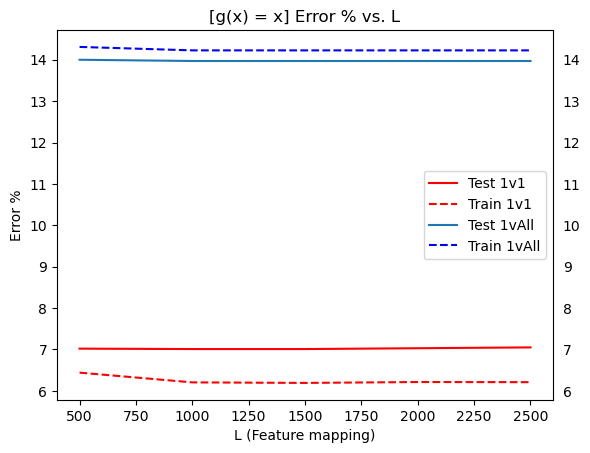

In [23]:
print("g(x) = x Error % vs L")
plot_graphs(id_test_res, id_train_res, "[g(x) = x]")

### From this plot we can see that increasing the number of features hardly effects the error % of our classifiers

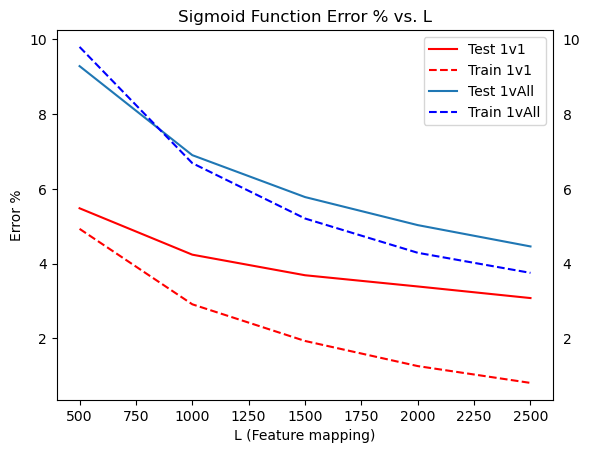

In [24]:
plot_graphs(sig_test_res, sig_train_res, "Sigmoid Function")

### From this plot, we can see that as the number of features increases, our testing error rate will decrease until it finds a local minima at L = 2000 and increases with further feature increasing. This occurs for both classifiers.

### However, we can see that the training error rate will still continue to decrease

### This means that once the number of features passes a certain threshold value, the model will become overfit to the training data and result in a poorer performing model

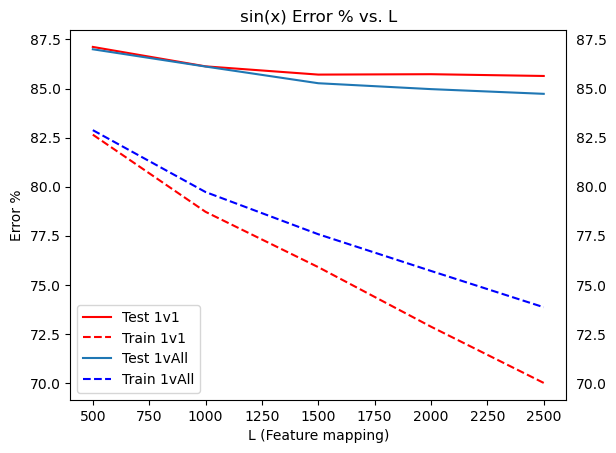

In [25]:
plot_graphs(sin_test_res, sin_train_res, "sin(x)")

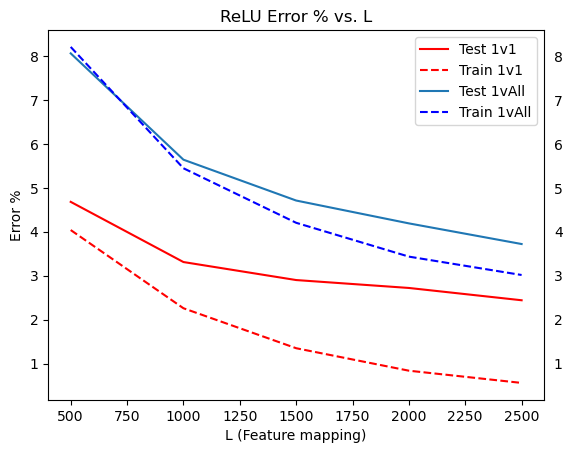

In [26]:
plot_graphs(max_test_res, max_train_res, "ReLU")

### From this plot, we can see a similar effect as the plot for the Sigmoid mapping
### We can see the testing error decreas as L increases, but once L reaches a threshold value this error rate begins to rise. We have found a threshold value between L = 2000 and L = 2500
### We can again see that as L increases the training error rate will continue to decrease, with no inflection point.

### The same conclusion can be reached that once this happens there is an overfitting to the training data